<h1>Nhập các thư viện cần thiết</h1>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

<h2> Đọc dữ liệu và tạo dataframe cho bộ dữ liệu </h2>

In [2]:
df = pd.read_csv("ObesityData.csv")
df.head(5)

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [4]:
#Đọc các giá trị trong hàm mục tiêu 
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
#Kiểm tra dữ liệu có bị thiếu không
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
#Biến đổi dữ liệu dạng chuỗi thành dạng số
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

In [7]:
df.head()

Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     3     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     2     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     1     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     1     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  NObeyesdad  
0                               1  0.0  1.0     2       3           1  
1                               1  3.0  0.0     2       3           1  
2                               1  2.0  1.0     2       3           1  
3                               0  2.0  0.0     2       4           5  
4                               0  0.0  0.0     2       3           6

In [8]:
#Đọc dữ liệu sau khi từ dạng chuỗi thành dạng số 
print("Original to Encoded Mapping:")
for i, label in enumerate(encoder.classes_):
    print(f"{label}: {i}")

Original to Encoded Mapping:
Insufficient_Weight: 0
Normal_Weight: 1
Obesity_Type_I: 2
Obesity_Type_II: 3
Obesity_Type_III: 4
Overweight_Level_I: 5
Overweight_Level_II: 6


In [9]:
df.shape

(2111, 17)

In [10]:
#Tách dữ liệu thành hàm x và hàm mục tiêu y
x = df.drop('NObeyesdad', axis=1)
x.head()

Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0     3     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0     2     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0     1     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0     1     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8     2     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  MTRANS  
0                               1  0.0  1.0     2       3  
1                               1  3.0  0.0     2       3  
2                               1  2.0  1.0     2       3  
3                               0  2.0  0.0     2       4  
4                               0  0.0  0.0     2       3

In [11]:
y = df['NObeyesdad']
y.head()

0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int32

<h2> Chia bộ dữ liệu thành test và train </h2>

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h3> Thực hiện training model sử dụng mô hình Decision tree </h3>

In [13]:
model = tree.DecisionTreeClassifier(min_samples_leaf=2,random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [ ]:
# Hiển thị cây quyết định
plt.figure(figsize=(80,40),dpi=300)  
tree.plot_tree(
    model, 
    feature_names=x.columns, 
    class_names=encoder.classes_, 
    filled=True,
    fontsize=6
r)

plt.title("Decision Tree Visualization", fontsize=10)
plt.tight_layout(pad=2.0)
plt.show()


In [15]:
#Đưa ra độ chính xác và báo cáo phân loại
y_pred = model.predict(X_test)
print("=== Calculate the accuracy ===")
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\n=== Classification report ===")
print(classification_report(Y_test, y_pred))

=== Calculate the accuracy ===
Accuracy: 0.9132492113564669

=== Classification report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        86
           1       0.83      0.82      0.82        93
           2       0.95      0.92      0.94       102
           3       0.94      0.95      0.95        88
           4       1.00      0.99      0.99        98
           5       0.88      0.82      0.85        88
           6       0.90      0.94      0.92        79

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634




Pruned Tree Accuracy:
Train: 0.968855788761002
Test: 0.9132492113564669

Classification Report for Pruned Tree:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.85      0.85      0.85        93
           2       0.94      0.89      0.91       102
           3       0.94      0.94      0.94        88
           4       1.00      0.99      0.99        98
           5       0.84      0.86      0.85        88
           6       0.89      0.92      0.91        79

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



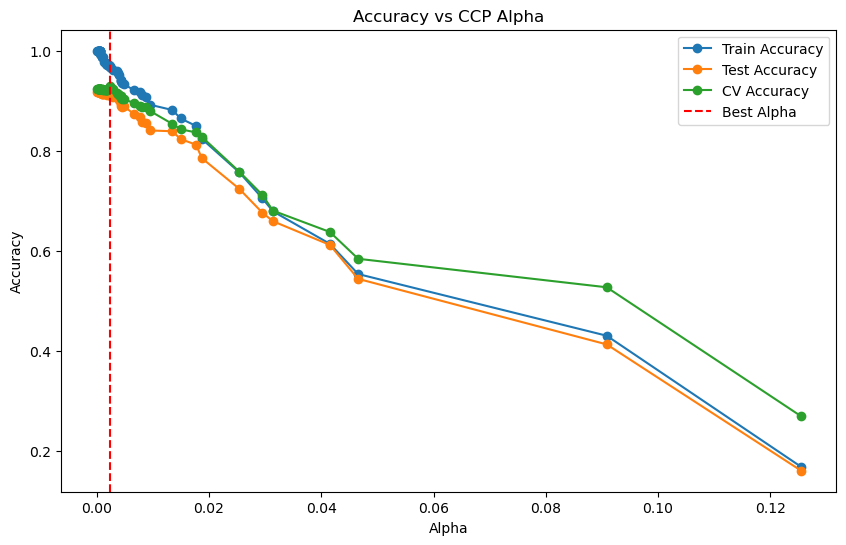

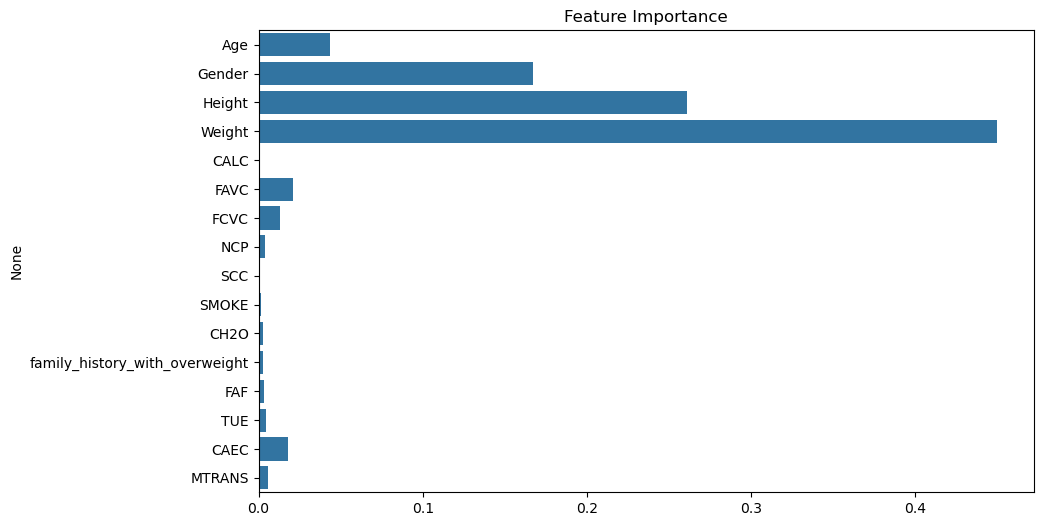

In [16]:
# Tính toán ccp_alpha và tạp chất (impurities)
path = model.cost_complexity_pruning_path(X_train, Y_train) 
#ccp_alpha là tham số điều chỉnh mức độ cắt tỉa.
#impurities đo lường tổng lỗi (gini hoặc entropy) của cây sau khi cắt tỉa ở mức ccp_alpha.
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees with different alpha values
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, Y_train)
    trees.append(tree)
#Với mỗi giá trị ccp_alpha, một cây được huấn luyện trên tập huấn luyện (X_train, Y_train).
#Tất cả các cây được lưu trữ trong danh sách trees.

# Đánh giá hiệu suất của từng cây
train_scores = [tree.score(X_train, Y_train) for tree in trees]
test_scores = [tree.score(X_test, Y_test) for tree in trees]


# Tìm giá trị ccp_alpha tốt nhất
cv_scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree, X_train, Y_train, cv=5)
    cv_scores.append(scores.mean())
best_alpha = ccp_alphas[np.argmax(cv_scores)]

# Huấn luyện cây với ccp_alpha tốt nhất
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, Y_train)

# In ra độ chính xác của cây cắt tỉa
print("\nPruned Tree Accuracy:")
print(f"Train: {accuracy_score(Y_train, pruned_tree.predict(X_train))}")
print(f"Test: {accuracy_score(Y_test, pruned_tree.predict(X_test))}")

# tạo báo cáo phân loại của cây cắt tỉa
y_pred = pruned_tree.predict(X_test)
print("\nClassification Report for Pruned Tree:")
print(classification_report(Y_test, y_pred))

# Vẽ biểu đồ độ chính xác của cây cắt tỉa
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy")
plt.plot(ccp_alphas, cv_scores, marker='o', label="CV Accuracy")
plt.axvline(x=best_alpha, color="red", linestyle="--", label="Best Alpha")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.legend()
plt.show()


# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=x.columns)
plt.title("Feature Importance")
plt.show()


In [17]:
# Biểu thị cây cắt tỉa 
def plot_pruned_tree(pruned_tree, feature_names, class_names):
    plt.figure(figsize=(80, 20))  # Set the size of the plot (width, height)
    plot_tree(
        pruned_tree, 
        feature_names=feature_names, 
        class_names=class_names, 
        filled=True, 
        rounded=True, 
        fontsize=10
    )
    plt.title("Decision Tree After Pruning")
    plt.tight_layout(pad=2.0)
    plt.show()

# Example usage
plot_pruned_tree(pruned_tree, feature_names=x.columns, class_names=encoder.classes_)


NameError: name 'plot_tree' is not defined

<Figure size 8000x2000 with 0 Axes>